<a href="https://colab.research.google.com/github/SANJAYV10/ICMR_Fruit_Disease/blob/main/bacterial_fungal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt



In [ ]:
img_size = 256,256
batches = 32

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/fruits',
    image_size = img_size,
    batch_size = batches,
    shuffle = True
)

Found 419 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names


In [ ]:
len(dataset)

14

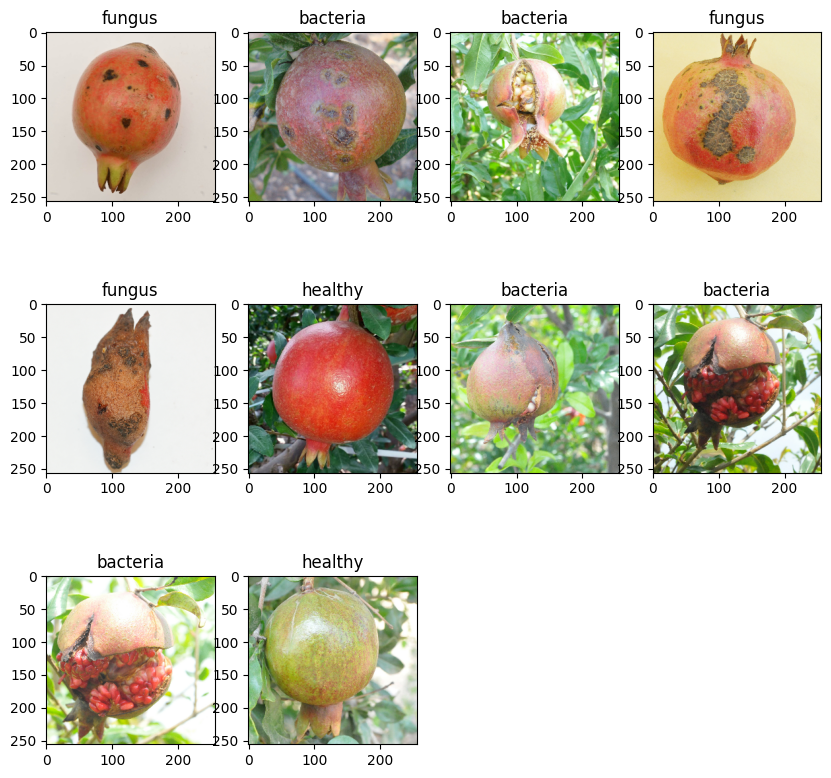

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(10):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])



In [ ]:

train_size = 0.8
len(dataset)*train_size



11.200000000000001

In [ ]:
train_data = dataset.take(11)

len(train_data)

11

In [ ]:
test_data = dataset.skip(11)
len(test_data)

3

In [ ]:
val_data = test_data.take(int(len(test_data)*0.5))

len(val_data)

1

In [ ]:
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, shuffle = True,shuffle_size = 10000, test_split = 0.1):

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  ds_size = len(ds)

  train_size = int(ds_size*train_split)
  val_size = int(ds_size*val_split)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)


  return train_ds, test_ds, val_ds

In [ ]:
train_ds , test_ds, val_ds = get_dataset_partition(dataset)

In [ ]:
len(train_ds)

11

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255.0)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomFlip("v"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu',input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(3,activation='softmax' )

])
model.build((32,256,256,3))

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_92 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_92 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_93 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [ ]:
from keras.api._v2.keras import metrics
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=50,
    batch_size=32,
    verbose = 1,
    validation_data = val_ds,
)

Epoch 1/50
11/11 [==============================] - 6s 125ms/step - loss: 1.1104 - accuracy: 0.3901 - val_loss: 1.0598 - val_accuracy: 0.4375
Epoch 2/50
11/11 [==============================] - 1s 74ms/step - loss: 1.0800 - accuracy: 0.3901 - val_loss: 1.0873 - val_accuracy: 0.3438
Epoch 3/50
11/11 [==============================] - 1s 74ms/step - loss: 1.0716 - accuracy: 0.3560 - val_loss: 1.0584 - val_accuracy: 0.3438
Epoch 4/50
11/11 [==============================] - 1s 74ms/step - loss: 1.0189 - accuracy: 0.4365 - val_loss: 1.0296 - val_accuracy: 0.4375
Epoch 5/50
11/11 [==============================] - 1s 72ms/step - loss: 0.9883 - accuracy: 0.4737 - val_loss: 1.0070 - val_accuracy: 0.4375
Epoch 6/50
11/11 [==============================] - 1s 72ms/step - loss: 0.9823 - accuracy: 0.4303 - val_loss: 1.0209 - val_accuracy: 0.3750
Epoch 7/50
11/11 [==============================] - 1s 78ms/step - loss: 0.9698 - accuracy: 0.4923 - val_loss: 0.9246 - val_accuracy: 0.5312
Epoch 8/50
1

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 39ms/step - loss: 0.3556 - accuracy: 0.8906


[0.3555952310562134, 0.890625]

In [ ]:
history

In [ ]:
history.params



{'verbose': 1, 'epochs': 50, 'steps': 11}

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'train Val Accuracy')

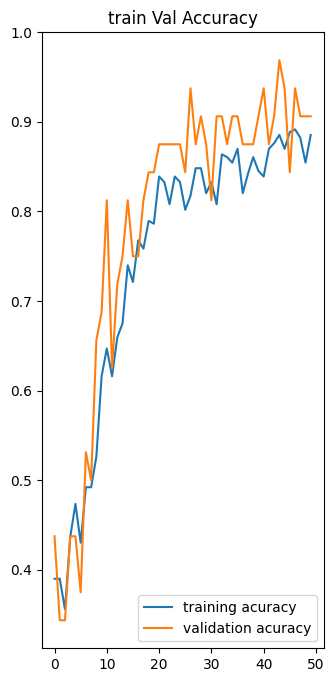

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc, label= "training acuracy")
plt.plot(range(50),val_acc, label= "validation acuracy")
plt.legend(loc='lower right')
plt.title("train Val Accuracy")


first image to predict
actual_label: fungus
1/1 [==============================] - 0s 166ms/step
predicted label : fungus


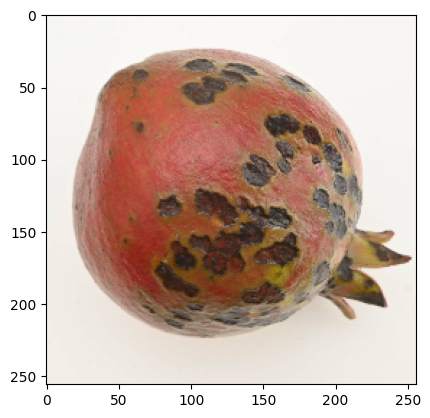

In [ ]:
for image_batch, labels_batch in test_ds.take(1):

  first_image = image_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual_label:",class_names[first_label])

  batch_predict = model.predict(image_batch)
  # print(np.argmax(batch_predict[0]))
  print('predicted label :', class_names[np.argmax(batch_predict[0])])


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = round( 100 * np.max(predictions))

    return predicted_class, confidence


1/1 [==============================] - 0s 29ms/step


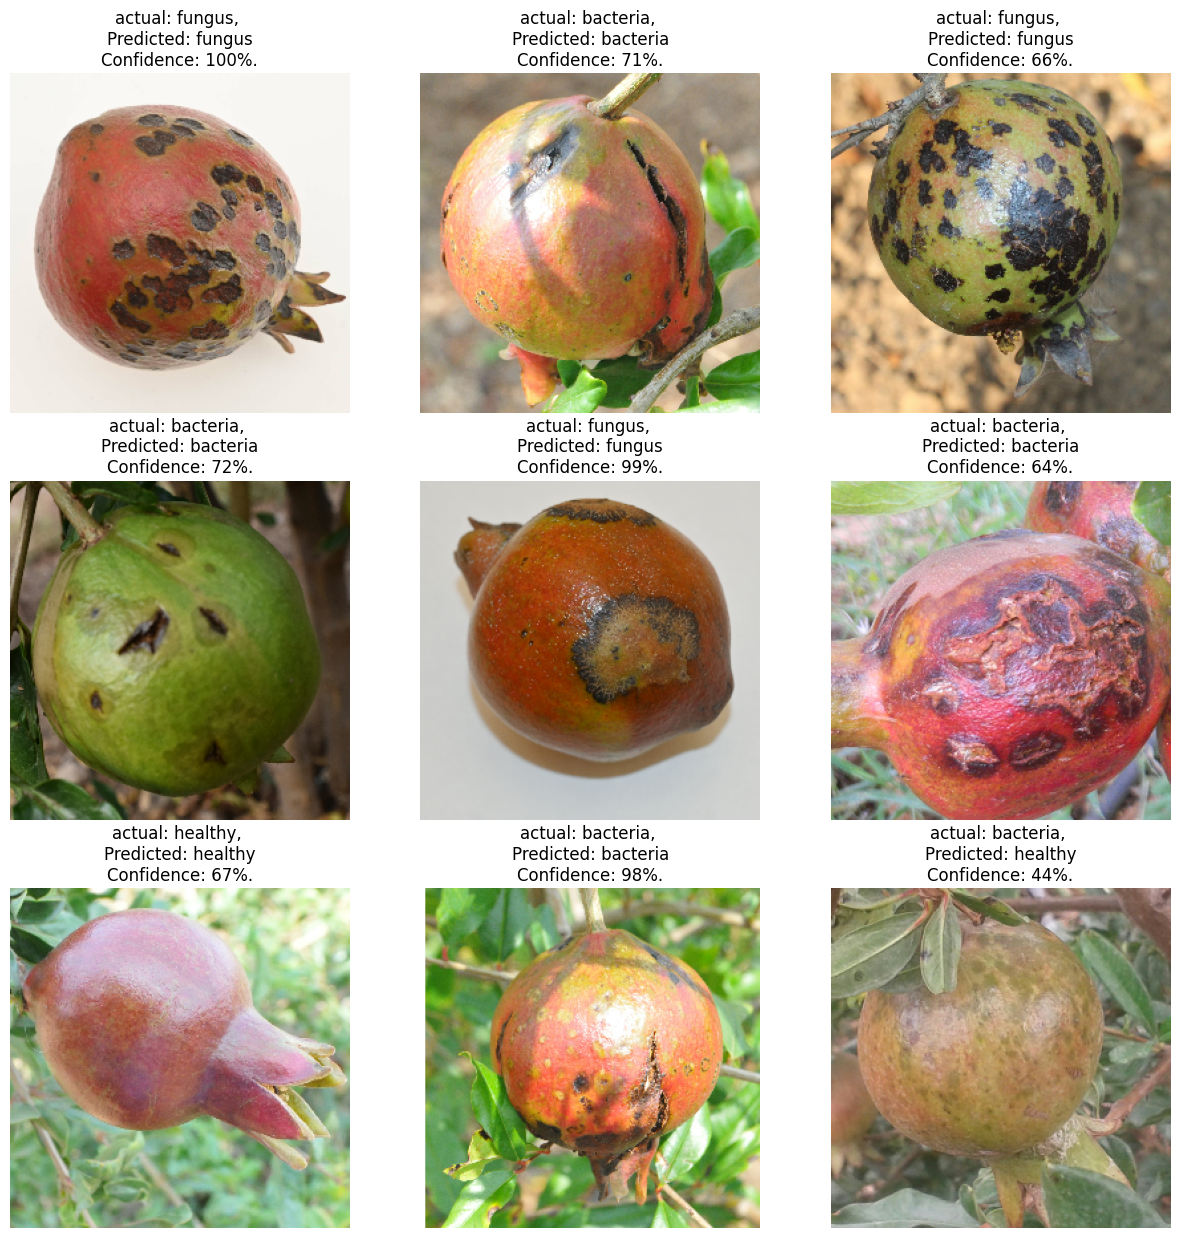

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class , confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"actual: {actual_class}, \nPredicted: {predicted_class}\nConfidence: {confidence}%.")


    plt.axis("off")

In [ ]:
im ='/content/test_data/bacterial-blight-of-pomegranate-pomegranate-2.jpg'

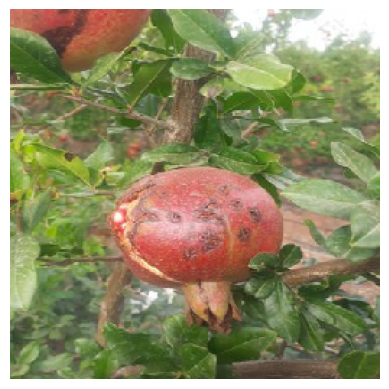

In [ ]:
img = tf.keras.preprocessing.image.load_img(im, target_size=(256, 256))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
predicted_class, confidence = predict(model, img)

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence}%")


1/1 [==============================] - 0s 34ms/step
Predicted Class: bacteria
Confidence: 77%
